In [1]:
!pip install arff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff
import warnings
warnings.filterwarnings("ignore")

data = arff.loadarff("phpkIxskf (1).arff")
df = pd.DataFrame(data[0])

In [2]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'


In [3]:
obj = df.select_dtypes(include=("object"))

decode = obj.apply(lambda x: x.str.decode('utf8'))

decode.head()

,V2,V3,V4,V5,V7,V8,V9,V11,V16,Class
0,management,married,tertiary,no,yes,no,unknown,may,unknown,1
1,technician,single,secondary,no,yes,no,unknown,may,unknown,1
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,1
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,1
4,unknown,single,unknown,no,no,no,unknown,may,unknown,1


In [4]:
df = df.drop(columns = ["V2","V3","V4","V5","V7","V8","V9","V11","V16","Class"], axis = 1)

df = pd.concat([df, decode], axis = 1)

new_order = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'Class']

df = df.reindex(columns=new_order)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,1
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,1
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,1
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,1
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,1


In [5]:
# Sütunların yeninden adlandırılması

df.rename(columns={'V1': 'yas',
                   'V2': 'is_turu',
                   'V3': 'medeni_hal',
                   'V4': 'egitim',
                   'V5': 'odeme_durumu',
                   'V6': 'bakiye',
                   'V7': 'konut_kredi_durum',
                   'V8': 'bireysel_kredi_durum',
                   'V9': 'iletisim_turu',
                   'V10': 'son_iletisim_gunu',
                   'V11': 'son_iletisim_ayi',
                   'V12': 'sure_saniye',
                   'V13': 'kampanya',
                   'V14': 'gecen_gun_sayisi',
                   'V15': 'onceki_iletisim_sayisi',
                   'V16': 'onceki_kampanya_sonucu',
                   'Class': 'abone_oldu_mu'}, inplace=True)

# İş türü değişkenindeki alt kategorilerin yeniden isimlendirilmesi

df["is_turu"] = df["is_turu"].replace("admin.", "admin")
df["is_turu"] = df["is_turu"].replace("blue-collar", "bluecollar")
df["is_turu"] = df["is_turu"].replace("self-employed", "selfemployed")

In [6]:
df.columns

Index(['yas', 'is_turu', 'medeni_hal', 'egitim', 'odeme_durumu', 'bakiye',
       'konut_kredi_durum', 'bireysel_kredi_durum', 'iletisim_turu',
       'son_iletisim_gunu', 'son_iletisim_ayi', 'sure_saniye', 'kampanya',
       'gecen_gun_sayisi', 'onceki_iletisim_sayisi', 'onceki_kampanya_sonucu',
       'abone_oldu_mu'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yas                     45211 non-null  float64
 1   is_turu                 45211 non-null  object 
 2   medeni_hal              45211 non-null  object 
 3   egitim                  45211 non-null  object 
 4   odeme_durumu            45211 non-null  object 
 5   bakiye                  45211 non-null  float64
 6   konut_kredi_durum       45211 non-null  object 
 7   bireysel_kredi_durum    45211 non-null  object 
 8   iletisim_turu           45211 non-null  object 
 9   son_iletisim_gunu       45211 non-null  float64
 10  son_iletisim_ayi        45211 non-null  object 
 11  sure_saniye             45211 non-null  float64
 12  kampanya                45211 non-null  float64
 13  gecen_gun_sayisi        45211 non-null  float64
 14  onceki_iletisim_sayisi  45211 non-null

In [8]:
df.isnull().sum()

yas                       0
is_turu                   0
medeni_hal                0
egitim                    0
odeme_durumu              0
bakiye                    0
konut_kredi_durum         0
bireysel_kredi_durum      0
iletisim_turu             0
son_iletisim_gunu         0
son_iletisim_ayi          0
sure_saniye               0
kampanya                  0
gecen_gun_sayisi          0
onceki_iletisim_sayisi    0
onceki_kampanya_sonucu    0
abone_oldu_mu             0
dtype: int64

In [9]:
# Tüm değişkenlerin ilk 5 datasını görme

pd.set_option('display.max_columns', None)

df

,yas,is_turu,medeni_hal,egitim,odeme_durumu,bakiye,konut_kredi_durum,bireysel_kredi_durum,iletisim_turu,son_iletisim_gunu,son_iletisim_ayi,sure_saniye,kampanya,gecen_gun_sayisi,onceki_iletisim_sayisi,onceki_kampanya_sonucu,abone_oldu_mu
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,1
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,1
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,1
3,47.0,bluecollar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,1
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17.0,nov,977.0,3.0,-1.0,0.0,unknown,2
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17.0,nov,456.0,2.0,-1.0,0.0,unknown,2
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17.0,nov,1127.0,5.0,184.0,3.0,success,2
45209,57.0,bluecollar,married,secondary,no,668.0,no,no,telephone,17.0,nov,508.0,4.0,-1.0,0.0,unknown,1


In [10]:
# Numerik ve kategorik kolonların seçilmesi

num_cols = ["yas", "bakiye", "son_iletisim_gunu", "sure_saniye",
            "kampanya", "gecen_gun_sayisi", "onceki_iletisim_sayisi"]

cat_cols = ["is_turu", "medeni_hal", "egitim", "odeme_durumu",
            "konut_kredi_durum", "bireysel_kredi_durum", "iletisim_turu",
            "son_iletisim_ayi", "onceki_kampanya_sonucu", "abone_oldu_mu"]

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yas,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
bakiye,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
son_iletisim_gunu,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
sure_saniye,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
kampanya,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
gecen_gun_sayisi,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
onceki_iletisim_sayisi,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [12]:
# Kategorik değişkenlerin alt kategorileri

for col in cat_cols:
    print(df[col].value_counts())
    print("- - - - - - - - - - - - -")

is_turu
bluecollar      9732
management      9458
technician      7597
admin           5171
services        4154
retired         2264
selfemployed    1579
entrepreneur    1487
unemployed      1303
housemaid       1240
student          938
unknown          288
Name: count, dtype: int64
- - - - - - - - - - - - -
medeni_hal
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
- - - - - - - - - - - - -
egitim
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
- - - - - - - - - - - - -
odeme_durumu
no     44396
yes      815
Name: count, dtype: int64
- - - - - - - - - - - - -
konut_kredi_durum
yes    25130
no     20081
Name: count, dtype: int64
- - - - - - - - - - - - -
bireysel_kredi_durum
no     37967
yes     7244
Name: count, dtype: int64
- - - - - - - - - - - - -
iletisim_turu
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
- - - - - - - - - - - - -
son_iletisim_ayi
may    137

# Future Engineering

In [13]:
## UNKNOWN SORUNUNUN ÇÖZÜLMESİ

# İş türü değişkenindeki unknown alt kategorilerinin mod ile doldurulması

mode_value = df[df['is_turu'] != 'unknown']['is_turu'].mode()[0]
df['is_turu'].replace('unknown', mode_value, inplace=True)

# Eğitim değişkenindeki unknown alt kategorilerinin mod ile doldurulması

mode_value = df[df['egitim'] != 'unknown']['egitim'].mode()[0]
df['egitim'].replace('unknown', mode_value, inplace=True)

# Unknown alt kategorisi yüksek olan değişkenlerin seçilmesi ve unknown alt kategorilerinin silinmesi

has_unk_cat = ["onceki_kampanya_sonucu", "iletisim_turu"]
df[has_unk_cat] = df[has_unk_cat].replace('unknown', np.nan)

# Silinen değerlerin rastgele doldurulması

def fill_missing_values_randomly(df, column_name):
    non_missing_values = df[column_name].dropna().unique()
    df[column_name] = df[column_name].apply(
        lambda x: np.random.choice(non_missing_values) if pd.isnull(x) else x
    )

def fill_columns_randomly(df):
    columns_to_fill = has_unk_cat
    
    for column in columns_to_fill:
        fill_missing_values_randomly(df, column)

fill_columns_randomly(df)

## VERİ TÜRETME

# Yaş kategori gruplama

def yas_aralik(yas):
    if 18 <= yas <= 30:
        return "Genç Yetişkin"
    elif 30 < yas <= 65:
        return "Yetişkin"
    else:
        return "Yaşlı"

df["yas_aralik"] = df["yas"].apply(yas_aralik)

# Bakiye kategori gruplama

q1 = df['bakiye'].quantile(0.25)
q2 = df['bakiye'].quantile(0.50)
q3 = df['bakiye'].quantile(0.75)

def bakiye_aralik(bakiye):
    if bakiye <= q1:
        return "Düşük Bakiye" # -8019, 72 arası
    elif q1 < bakiye <= q2: 
        return "Orta Bakiye" # 73, 448 arası
    elif q2 < bakiye <= q3:
        return "Yüksek Bakiye" # 449, 1428 arası
    elif q3 < bakiye:
        return "Çok Yüksek Bakiye" # 1429, 102127 arası

df["bakiye_aralik"] = df["bakiye"].apply(bakiye_aralik)

# Mesleğe göre çalışıyor veya çalışmıyor olarak gruplama

def calisma_durum(is_turu):
    if is_turu in ["unemployed", "student", "retired"]:
        return "Çalışmıyor"
    else:
        return "Çalışıyor"
    
df["calisma_durum"] = df["is_turu"].apply(calisma_durum)

# Gün sayısı -1 ise iletişime geçilmedi -1'den farklı ise iletişime geçildi olarak gruplama

def iletisim_durum(gecen_gun_sayisi):
    if gecen_gun_sayisi == -1:
        return "İletişime Geçilmedi"
    else:
        return "İletişime Geçildi"
    
df["iletisim_durum"] = df["gecen_gun_sayisi"].apply(iletisim_durum)

cat_cols.extend(["yas_aralik", "bakiye_aralik", "calisma_durum", "iletisim_durum"])

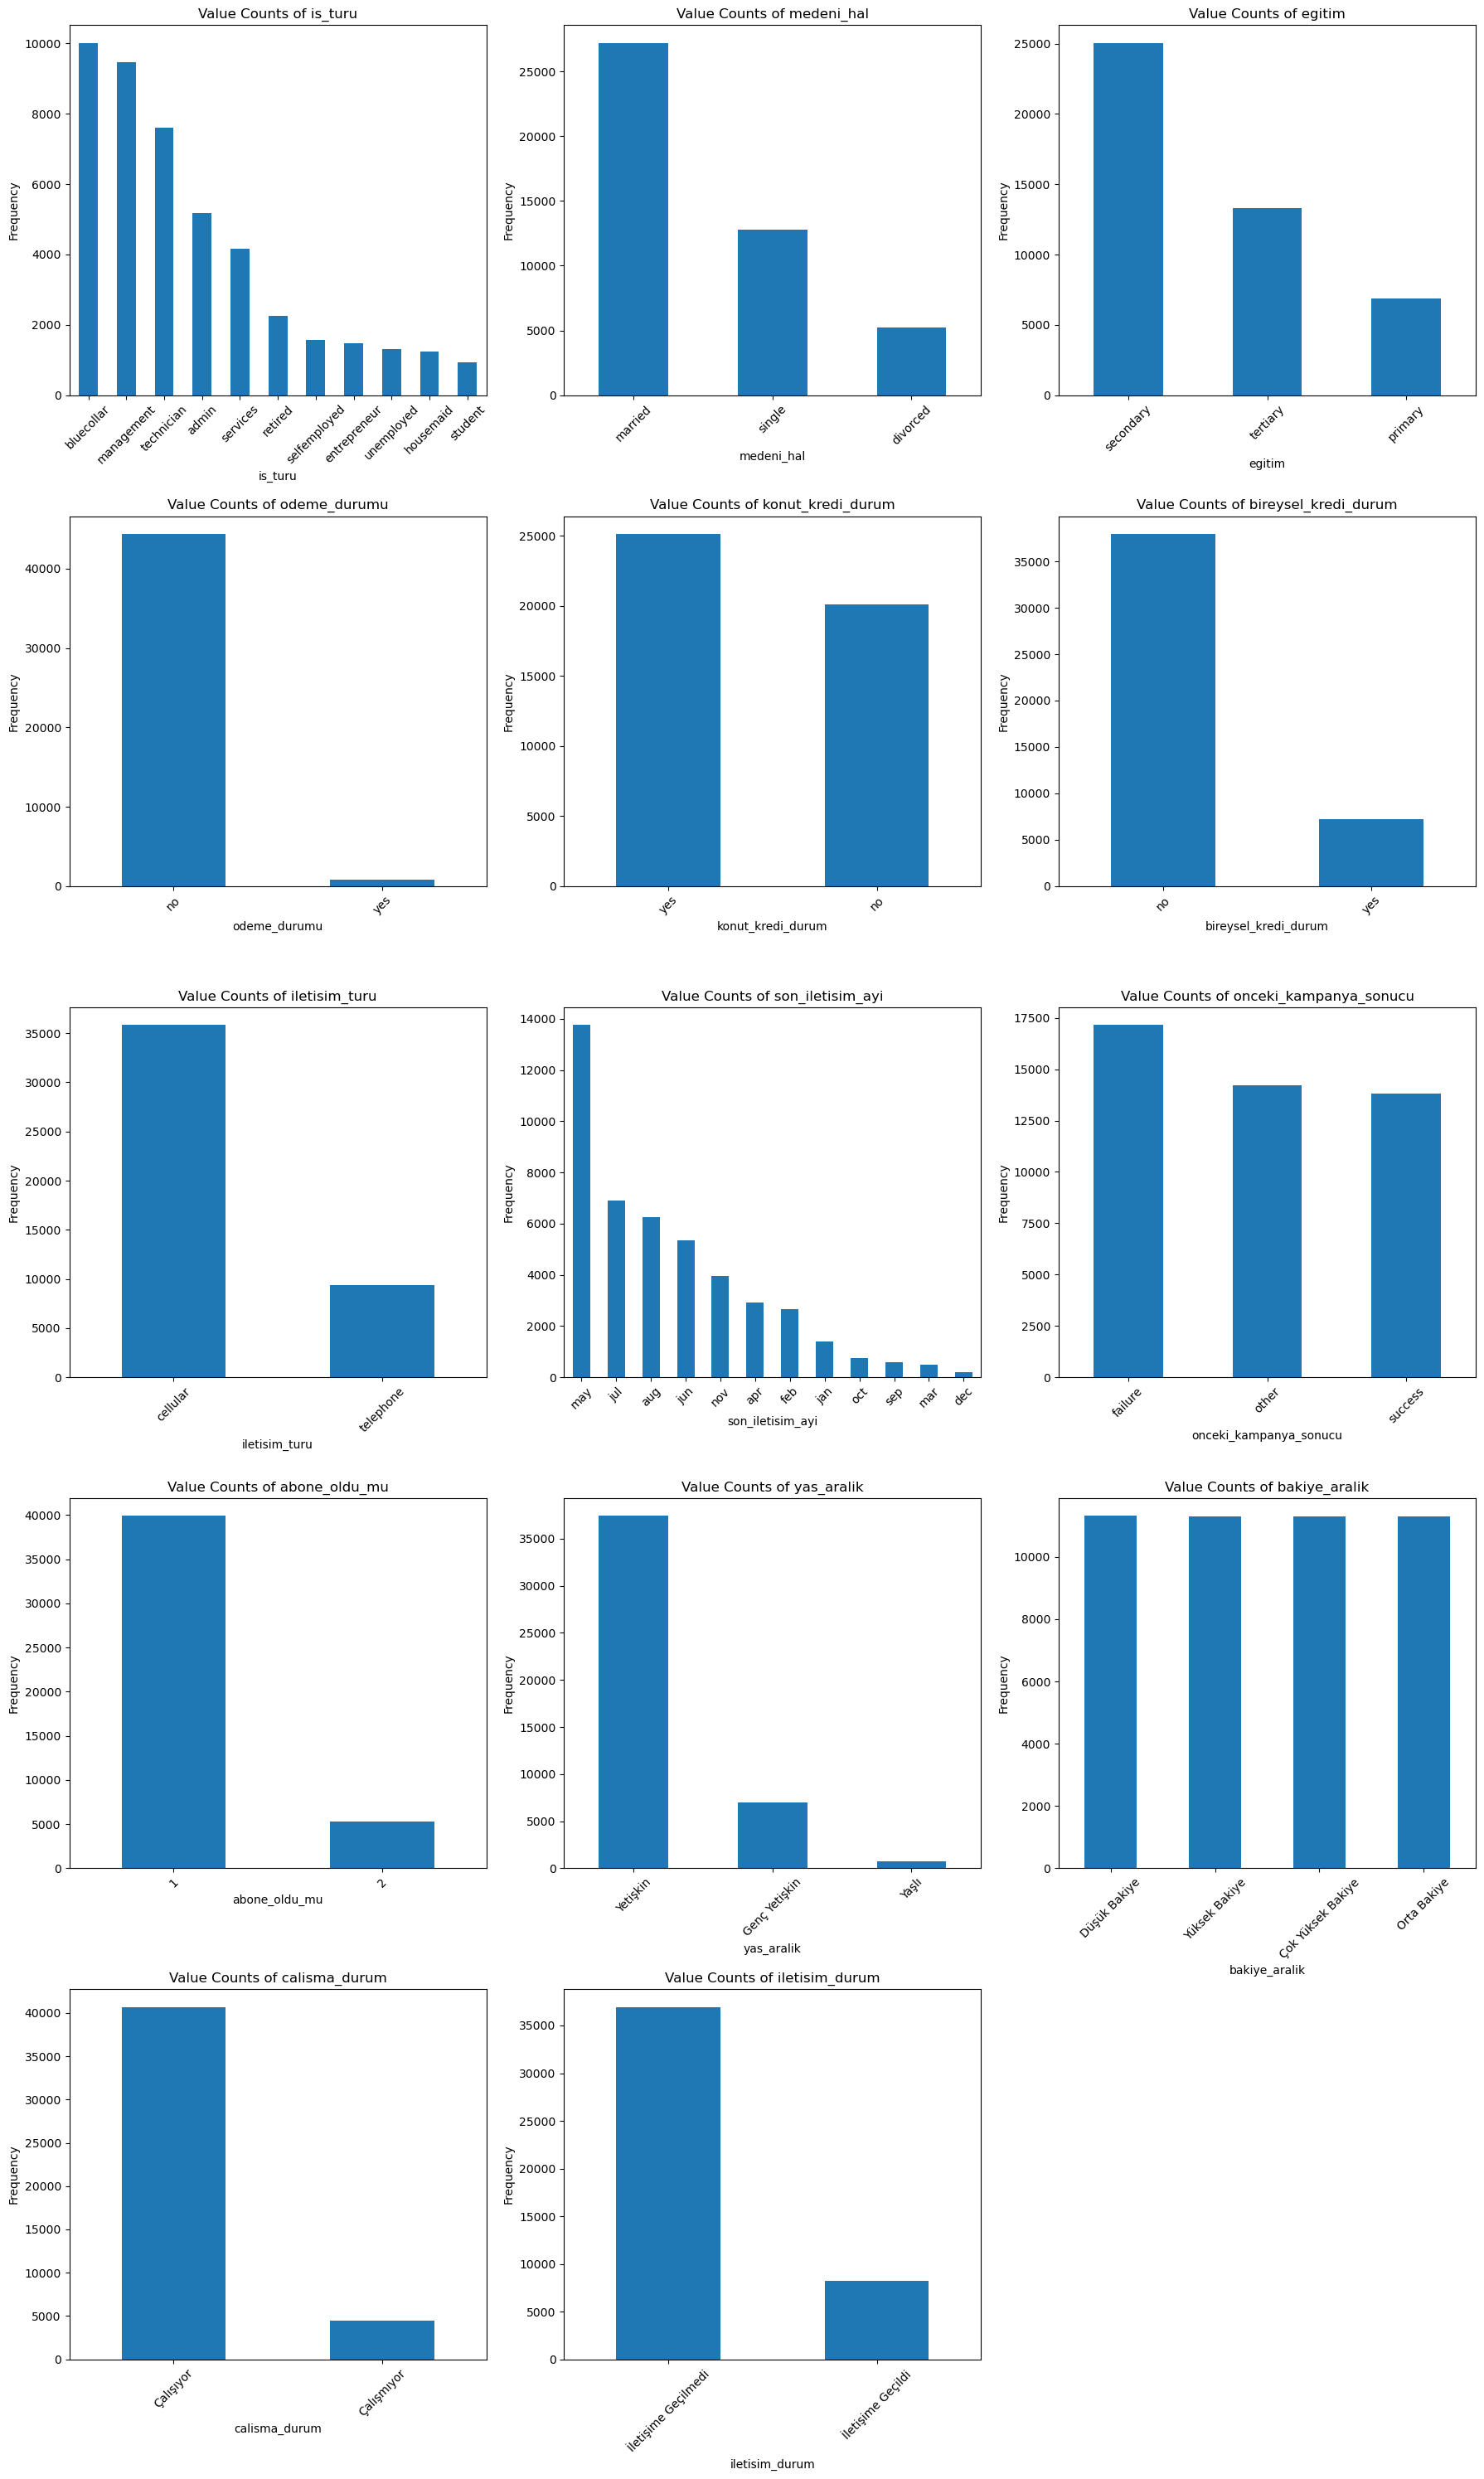

In [14]:
import matplotlib.pyplot as plt

# Grafiklerin boyutunu ve yatayda sıralama sayısını belirle
num_plots = len(cat_cols)
cols = 3
num_rows = (num_plots - 1) // cols + 1

# Grafikleri yatayda sıralı olarak oluşturma
plt.figure(figsize=(18, 6*num_rows))  # Grafik boyutunu ayarla

# Her bir kategorik değişken için çubuk grafiği oluşturma
for i, col in enumerate(cat_cols, 1):
    plt.subplot(num_rows, cols, i)  # subplot oluştur
    value_counts = df[col].value_counts()
    value_counts.plot(kind="bar")  # çubuk grafik oluştur
    plt.xlabel(col)  # X ekseninin etiketini belirle
    plt.ylabel("Frequency")  # Y ekseninin etiketini belirle
    plt.title(f"Value Counts of {col}")  # Grafik başlığını belirle
    plt.xticks(rotation=45)  # X eksenindeki etiketleri döndür

plt.tight_layout()  # subplotlar arasındaki boşluğu ayarla
plt.show()  # Grafiği göster

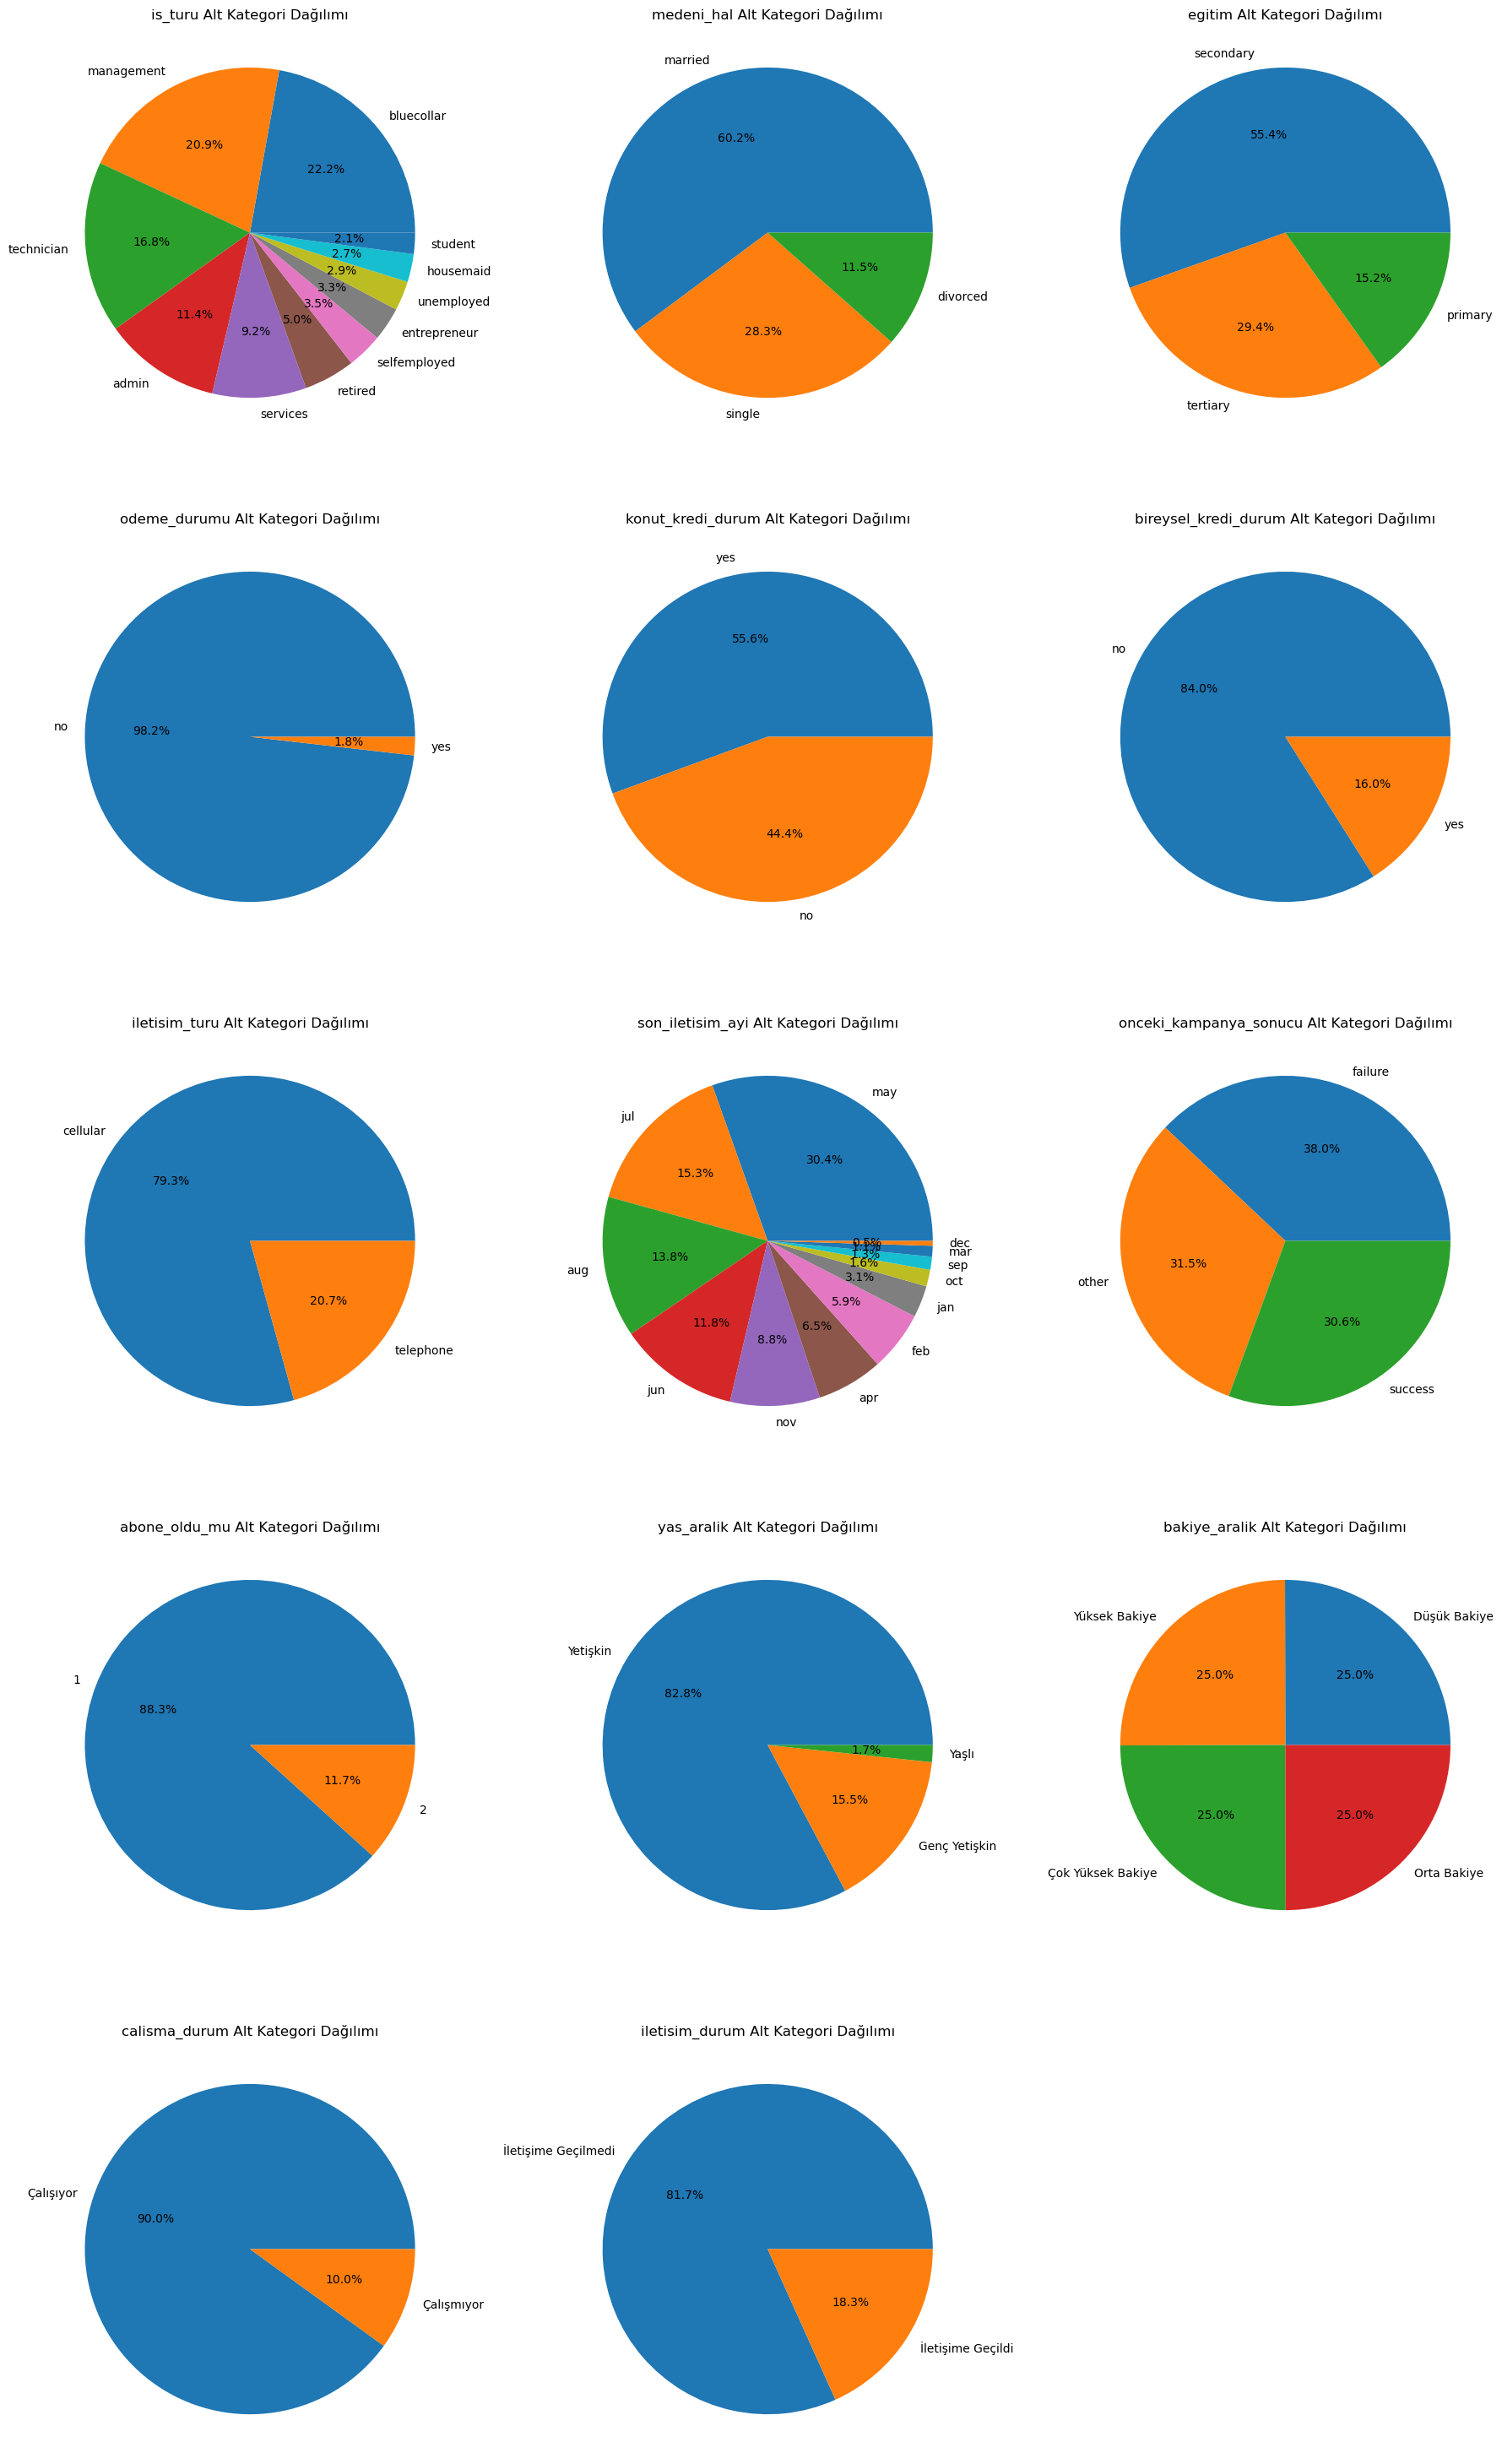

In [15]:
# Grafikleri yatayda sıralı olarak oluşturma
plt.figure(figsize=(18, 6*num_rows))  # Grafik boyutunu ayarla

# Her bir kategorik değişken için pasta grafiği oluşturma
for i, col in enumerate(cat_cols, 1):
    labels = df[col].value_counts().index
    counts = df[col].value_counts().values
    
    plt.subplot(num_rows, cols, i)  # subplot oluştur
    plt.pie(counts, labels=labels, autopct='%1.1f%%')
    plt.title(col + " Alt Kategori Dağılımı")

plt.tight_layout()  # subplotlar arasındaki boşluğu ayarla
plt.show()  # Grafiği göster

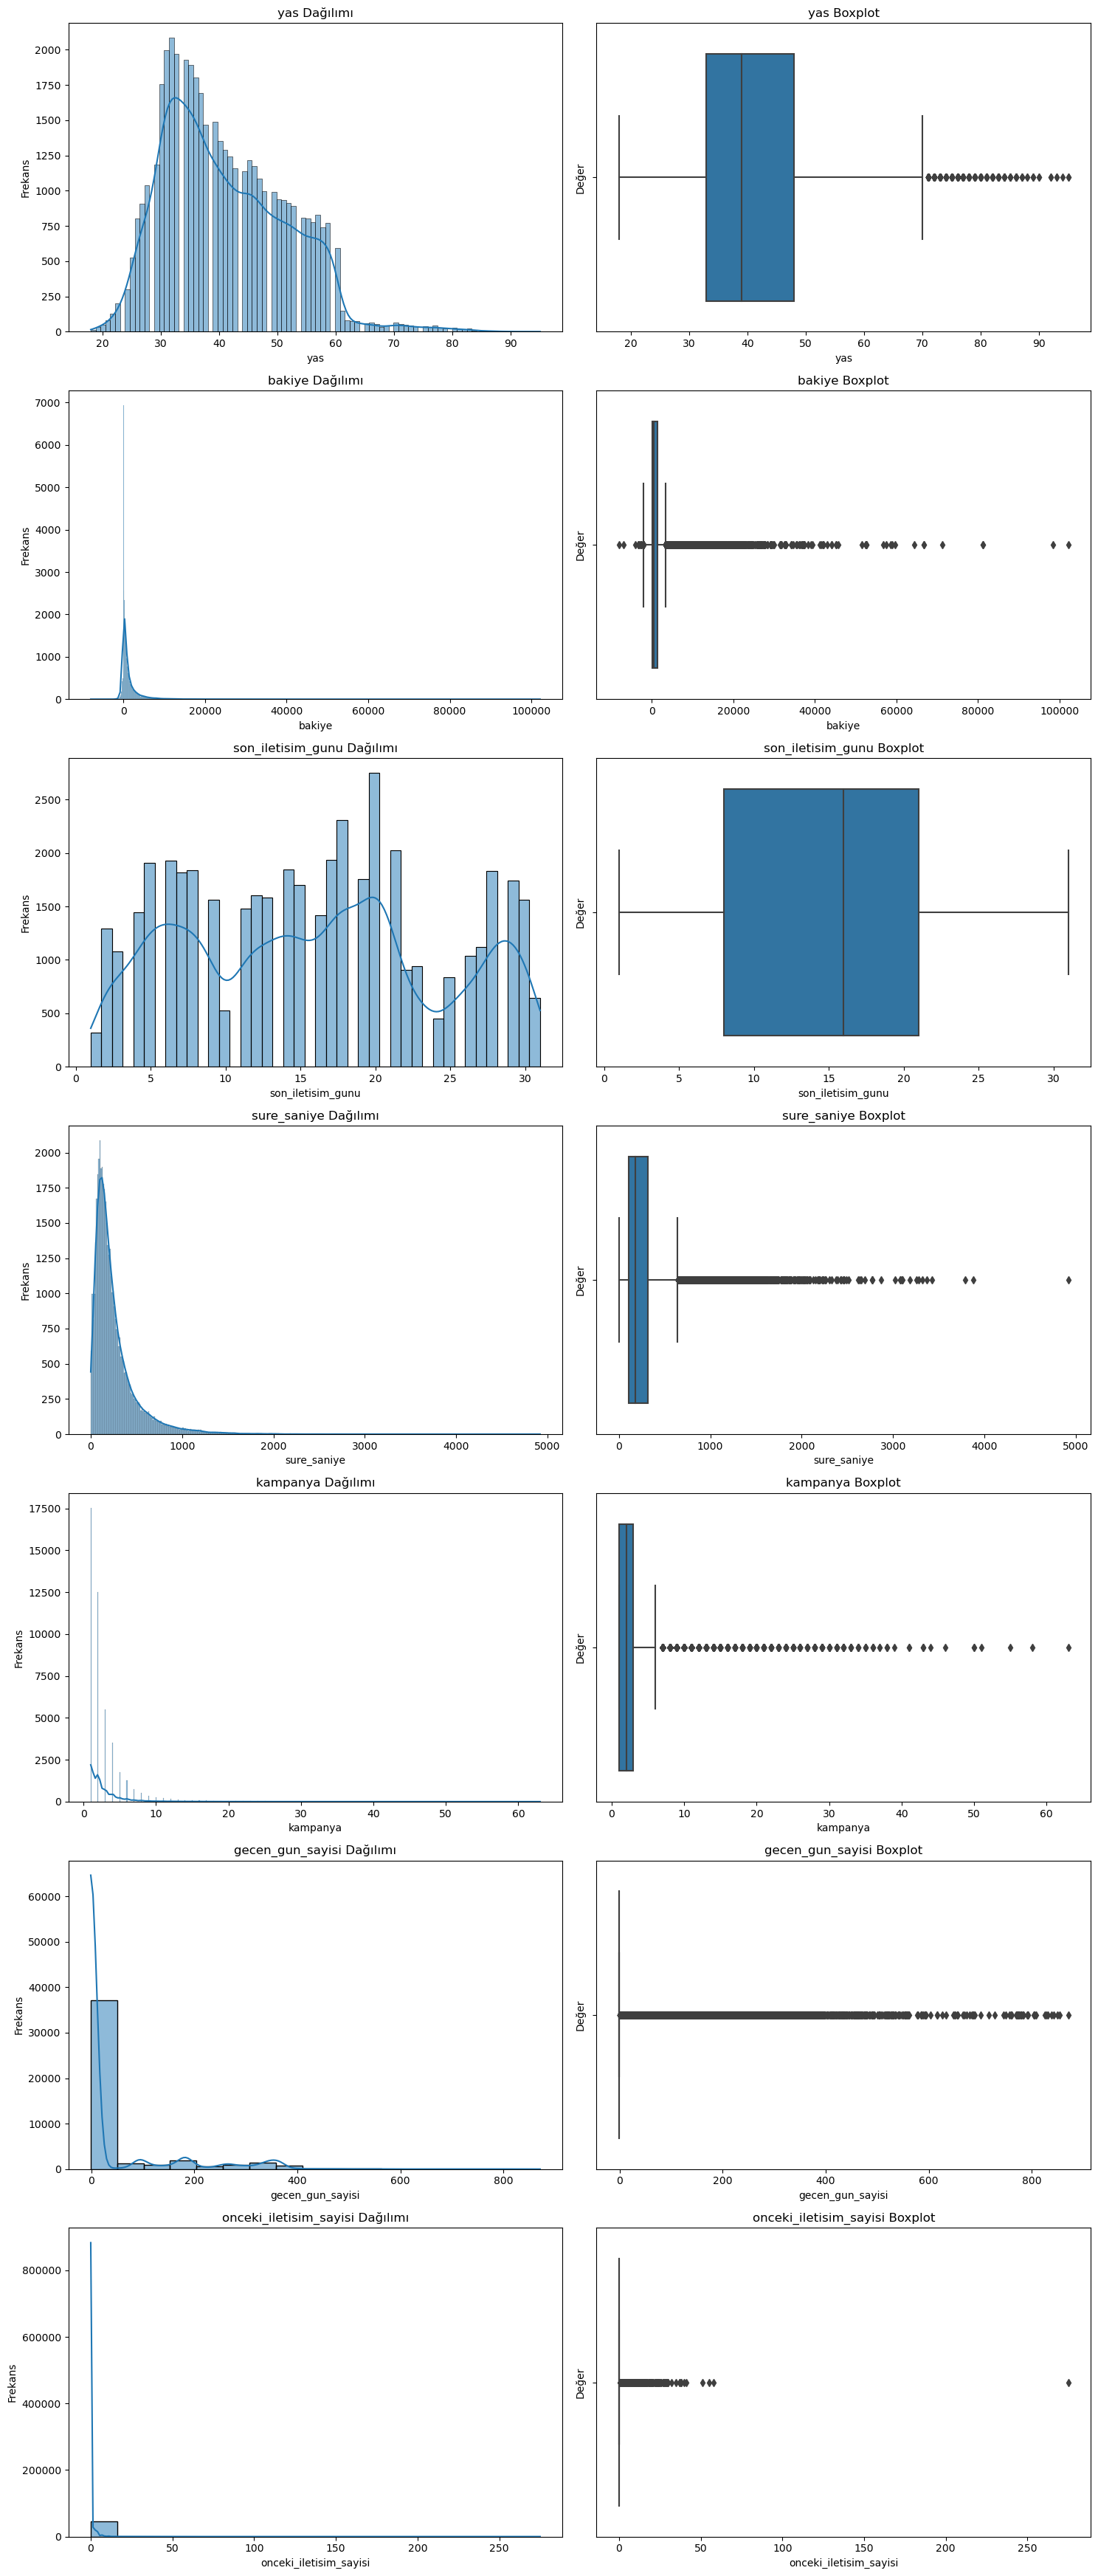

In [16]:
# Grafiklerin boyutunu ve yatayda sıralama sayısını belirle
num_plots = len(num_cols)

# Grafikleri yatayda sıralı olarak oluşturma
fig, axes = plt.subplots(nrows=num_plots, ncols=2, figsize=(15, 5*num_plots))

# Her bir sayısal değişken için histplot ve boxplot oluşturma
for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(col + " Dağılımı")
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel("Frekans")
    
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(col + " Boxplot")
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel("Değer")
    
plt.tight_layout()  # subplotlar

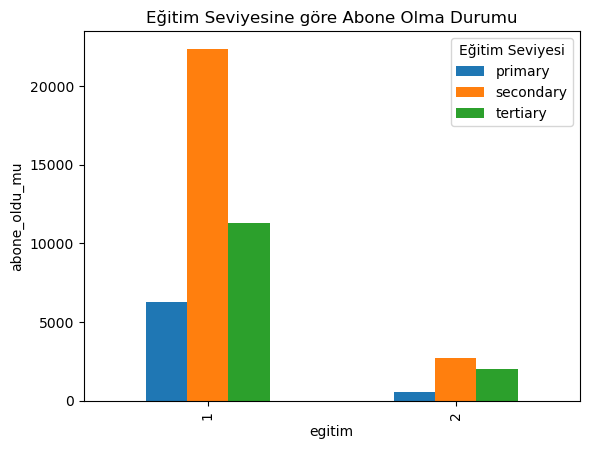

In [17]:
counts = df.groupby(["abone_oldu_mu", "egitim"]).size().unstack()

counts.plot(kind="bar")
plt.xlabel("egitim")
plt.ylabel("abone_oldu_mu")
plt.title("Eğitim Seviyesine göre Abone Olma Durumu")
plt.legend(title="Eğitim Seviyesi", loc='upper right')
plt.show()

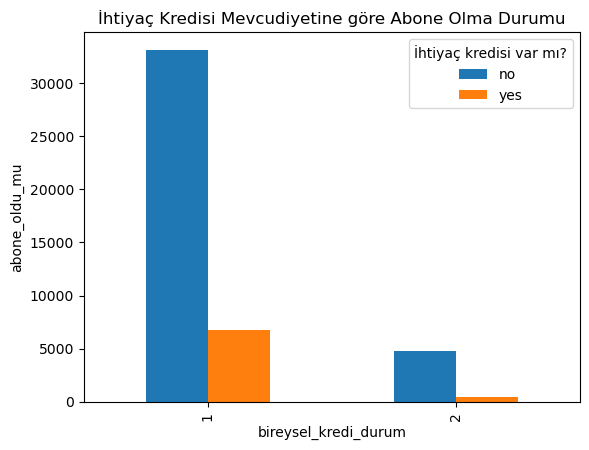

In [18]:
counts = df.groupby(["abone_oldu_mu", "bireysel_kredi_durum"]).size().unstack()

counts.plot(kind="bar")
plt.xlabel("bireysel_kredi_durum")
plt.ylabel("abone_oldu_mu")
plt.title("İhtiyaç Kredisi Mevcudiyetine göre Abone Olma Durumu")
plt.legend(title="İhtiyaç kredisi var mı?", loc='upper right')
plt.show()

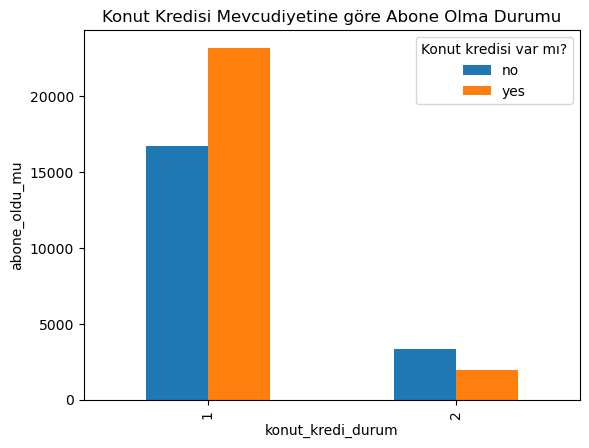

In [19]:
counts = df.groupby(["abone_oldu_mu", "konut_kredi_durum"]).size().unstack()

counts.plot(kind="bar")
plt.xlabel("konut_kredi_durum")
plt.ylabel("abone_oldu_mu")
plt.title("Konut Kredisi Mevcudiyetine göre Abone Olma Durumu")
plt.legend(title="Konut kredisi var mı?", loc='upper right')
plt.show()

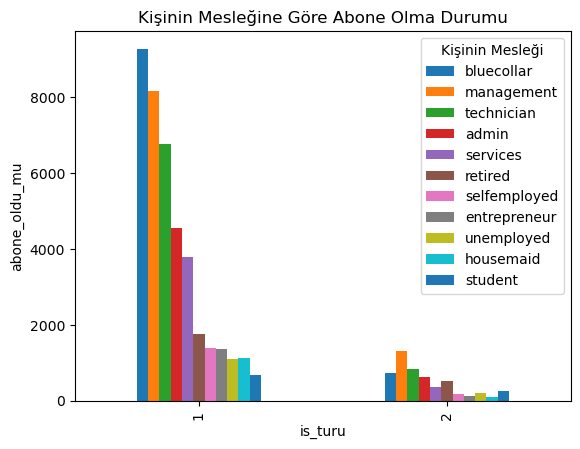

In [20]:
counts = df.groupby(["abone_oldu_mu", "is_turu"]).size().unstack()

counts_sorted = counts.sum().sort_values(ascending=False)
sorted_columns = counts_sorted.index
counts_sorted = counts[sorted_columns]

counts_sorted.plot(kind="bar")
plt.xlabel("is_turu")
plt.ylabel("abone_oldu_mu")
plt.title("Kişinin Mesleğine Göre Abone Olma Durumu")
plt.legend(title="Kişinin Mesleği", loc='upper right')
plt.show()

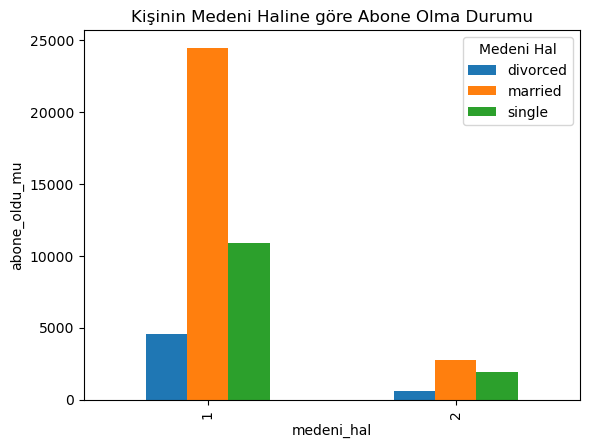

In [21]:
counts = df.groupby(["abone_oldu_mu", "medeni_hal"]).size().unstack()

counts.plot(kind="bar")
plt.xlabel("medeni_hal")
plt.ylabel("abone_oldu_mu")
plt.title("Kişinin Medeni Haline göre Abone Olma Durumu")
plt.legend(title="Medeni Hal", loc='upper right')
plt.show()

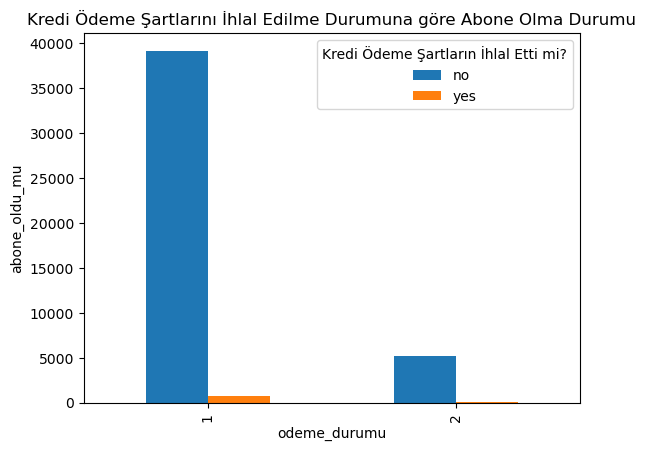

In [22]:
counts = df.groupby(["abone_oldu_mu", "odeme_durumu"]).size().unstack()

counts.plot(kind="bar")
plt.xlabel("odeme_durumu")
plt.ylabel("abone_oldu_mu")
plt.title("Kredi Ödeme Şartlarını İhlal Edilme Durumuna göre Abone Olma Durumu")
plt.legend(title="Kredi Ödeme Şartların İhlal Etti mi?", loc='upper right')
plt.show()

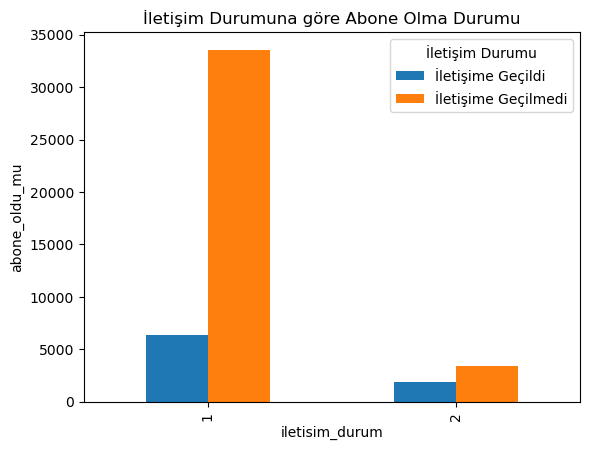

In [23]:
counts = df.groupby(["abone_oldu_mu", "iletisim_durum"]).size().unstack()

counts.plot(kind="bar")
plt.xlabel("iletisim_durum")
plt.ylabel("abone_oldu_mu")
plt.title("İletişim Durumuna göre Abone Olma Durumu")
plt.legend(title="İletişim Durumu", loc='upper right')
plt.show()

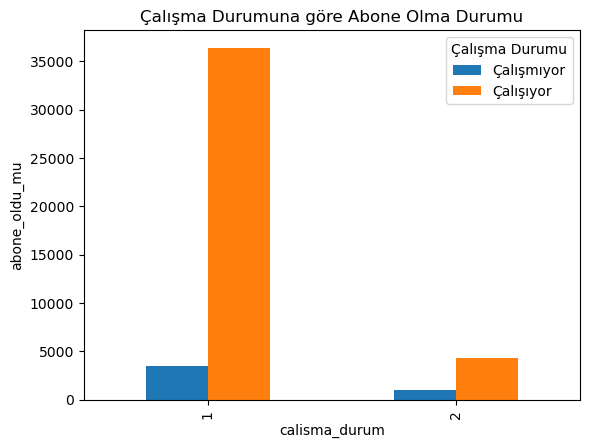

In [24]:
counts = df.groupby(["abone_oldu_mu", "calisma_durum"]).size().unstack()

counts.plot(kind="bar")
plt.xlabel("calisma_durum")
plt.ylabel("abone_oldu_mu")
plt.title("Çalışma Durumuna göre Abone Olma Durumu")
plt.legend(title="Çalışma Durumu", loc='upper right')
plt.show()

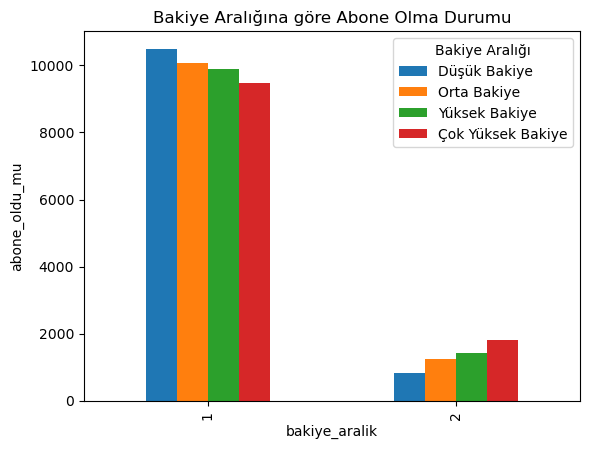

In [25]:
counts = df.groupby(["abone_oldu_mu", "bakiye_aralik"]).size().unstack()

counts.plot(kind="bar")
plt.xlabel("bakiye_aralik")
plt.ylabel("abone_oldu_mu")
plt.title("Bakiye Aralığına göre Abone Olma Durumu")
plt.legend(title="Bakiye Aralığı", loc='upper right')
plt.show()

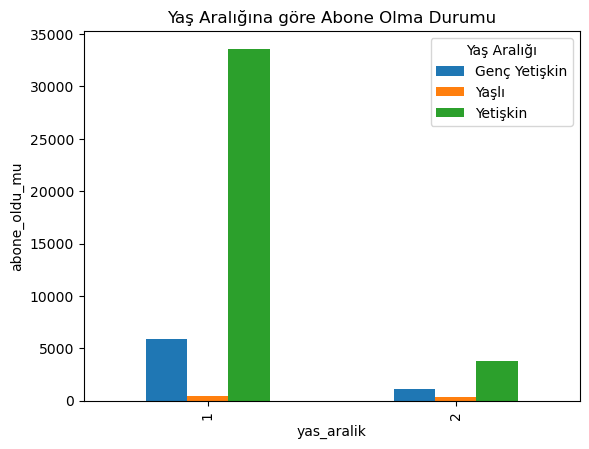

In [26]:
counts = df.groupby(["abone_oldu_mu", "yas_aralik"]).size().unstack()

counts.plot(kind="bar")
plt.xlabel("yas_aralik")
plt.ylabel("abone_oldu_mu")
plt.title("Yaş Aralığına göre Abone Olma Durumu")
plt.legend(title="Yaş Aralığı", loc='upper right')
plt.show()

In [27]:
df = df.drop(["yas_aralik", "bakiye_aralik", "calisma_durum", "iletisim_durum"], axis=1)

In [28]:
                                    # ENCODING

#--------------------------------------------------------------------------------------

label_encode = ["egitim"]

label_encoder = LabelEncoder()

for col in label_encode:
    df[col] = label_encoder.fit_transform(df[col])

#--------------------------------------------------------------------------------------

is_turu_encode = {'bluecollar':1, 'management':2, 'technician':3, 'admin':4,
                'services':5, 'retired':6, 'selfemployed':7, 'entrepreneur':8,
                'unemployed':9, 'housemaid':10, 'student':11}

df['is_turu'] = df['is_turu'].map(is_turu_encode)

#--------------------------------------------------------------------------------------

medeni_hal_encode = {'married':1, 'single':2, 'divorced':3}

df['medeni_hal'] = df['medeni_hal'].map(medeni_hal_encode)

#--------------------------------------------------------------------------------------

odeme_durumu_encode = {'no':1, 'yes':2}

df['odeme_durumu'] = df['odeme_durumu'].map(odeme_durumu_encode)

#--------------------------------------------------------------------------------------

konut_kredi_durum_encode = {'no':1, 'yes':2}

df['konut_kredi_durum'] = df['konut_kredi_durum'].map(konut_kredi_durum_encode)

#--------------------------------------------------------------------------------------

bireysel_kredi_durum_encode = {'no':1, 'yes':2}

df['bireysel_kredi_durum'] = df['bireysel_kredi_durum'].map(bireysel_kredi_durum_encode)

#--------------------------------------------------------------------------------------

iletisim_turu_encode = {'cellular':1, 'telephone':2}

df['iletisim_turu'] = df['iletisim_turu'].map(iletisim_turu_encode)

#--------------------------------------------------------------------------------------

son_iletisim_ayi_encode = {'jan':1, 'feb':2, 'mar':3, 'apr':4,
                           'may':5, 'jun':6, 'jul':7, 'aug':8,
                           'sep':9, 'oct':10, 'nov':11, 'dec':12}

df['son_iletisim_ayi'] = df['son_iletisim_ayi'].map(son_iletisim_ayi_encode)

#--------------------------------------------------------------------------------------

onceki_kampanya_sonucu_encode = {'other':1, 'failure':2, 'success':3}

df['onceki_kampanya_sonucu'] = df['onceki_kampanya_sonucu'].map(onceki_kampanya_sonucu_encode)

#--------------------------------------------------------------------------------------

#abone_oldu_mu? --> 'no':1, 'yes':2

#--------------------------------------------------------------------------------------

#yas_aralik_encode = {'Genç Yetişkin':1, 'Yetişkin':2, 'Yaşlı':3}

#df['yas_aralik'] = df['yas_aralik'].map(yas_aralik_encode)

#--------------------------------------------------------------------------------------

#calisma_durum_encode = {'Çalışmıyor':1, 'Çalışıyor':2}

#df['calisma_durum'] = df['calisma_durum'].map(calisma_durum_encode)

#--------------------------------------------------------------------------------------

#iletisim_durum_encode = {'İletişime Geçilmedi':1, 'İletişime Geçildi':2}

#df['iletisim_durum'] = df['iletisim_durum'].map(iletisim_durum_encode)

#--------------------------------------------------------------------------------------

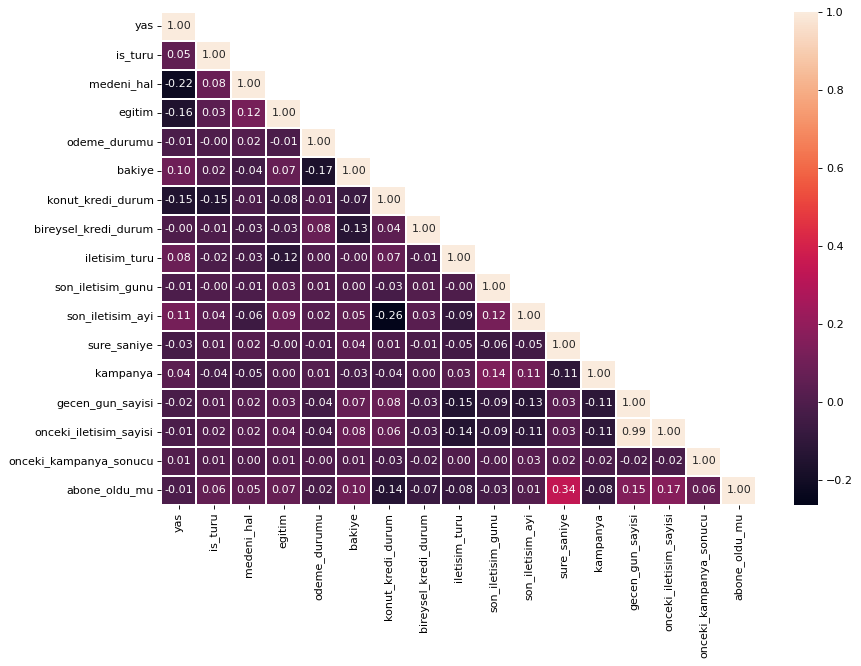

In [29]:
# Calculation of the Spearman correlation
target = 'abone_oldu_mu'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True,fmt='.2f', linewidths=0.2)
plt.show()